In [ ]:
import os
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle

In [2]:
plt.rcParams["figure.dpi"] = 120

In [3]:
data_dir = "../data"

In [149]:
# AG-News, Identity Counterfactual
dataset = "ag_news"
experiment = "identity_counterfactual"

dfs = [
    # (
    #     "BERT 100",
    #     "Sports",
    #     pd.read_pickle(f"{data_dir}/full/bert_results_5795_ds-ag_news.pkl"),
    # ),
    (
        "BERT",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_5877_ds-ag_news.pkl"),
    ),
    (
        "RoBERTa",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/roberta_results_5904_ds-ag_news.pkl"),
    ),
    (
        "ALBERT",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/albert_results_5905_ds-ag_news.pkl"),
    ),
    (
        "DistilBERT",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/distilbert_results_5906_ds-ag_news.pkl"),
    ),
    (
        "ELECTRA",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/electra_results_5903_ds-ag_news.pkl"),
    ),
]

In [157]:
# AG-News, BERT Different Counterfactuals
dataset = "ag_news"
experiment = "bert_counterfactuals"

dfs = [
    (
        "Identity",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_5877_ds-ag_news.pkl"),
    ),
    (
        "Constant",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_5917_cf-constant_ds-ag_news.pkl"),
    ),
    (
        "Synonym",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_5918_cf-synonym_ds-ag_news.pkl"),
    ),
    (
        "Random",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_5919_cf-random_ds-ag_news.pkl"),
    ),
]

In [165]:
# ScienceQA, Identity Counterfactual
dataset = "scienceqa"
experiment = "identity_counterfactual"

dfs = [
    (
        "BERT",
        "geography",
        pd.read_pickle(f"{data_dir}/full/bert_results_6079_ds-scienceqa.pkl"),
    ),
    (
        "RoBERTa",
        "geography",
        pd.read_pickle(f"{data_dir}/full/roberta_results_6080_ds-scienceqa.pkl"),
    ),
    (
        "ALBERT",
        "geography",
        pd.read_pickle(f"{data_dir}/full/albert_results_6081_ds-scienceqa.pkl"),
    ),
    (
        "DistilBERT",
        "geography",
        pd.read_pickle(f"{data_dir}/full/distilbert_results_6082_ds-scienceqa.pkl"),
    ),
    (
        "ELECTRA",
        "geography",
        pd.read_pickle(f"{data_dir}/full/electra_results_6083_ds-scienceqa.pkl"),
    ),
]

In [173]:
# ScienceQA, BERT Different Counterfactuals
dataset = "scienceqa"
experiment = "bert_counterfactuals"

dfs = [
    (
        "Identity",
        "geography",
        pd.read_pickle(f"{data_dir}/full/bert_results_6079_ds-scienceqa.pkl"),
    ),
    (
        "Constant",
        "geography",
        pd.read_pickle(f"{data_dir}/full/bert_results_6084_cf-constant_ds-scienceqa.pkl"),
    ),
    (
        "Synonym",
        "geography",
        pd.read_pickle(f"{data_dir}/full/bert_results_6085_cf-synonym_ds-scienceqa.pkl"),
    ),
    (
        "Random",
        "geography",
        pd.read_pickle(f"{data_dir}/full/bert_results_6086_cf-random_ds-scienceqa.pkl"),
    ),
]

In [181]:
# MMLU, Identity Counterfactual
dataset = "mmlu"
experiment = "identity_counterfactual"

dfs = [
    (
        "BERT",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/bert_results_6156_ds-mmlu.pkl"),
    ),
    (
        "RoBERTa",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/roberta_results_6157_ds-mmlu.pkl"),
    ),
    (
        "ALBERT",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/albert_results_6158_ds-mmlu.pkl"),
    ),
    (
        "DistilBERT",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/distilbert_results_6159_ds-mmlu.pkl"),
    ),
    (
        "ELECTRA",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/electra_results_6160_ds-mmlu.pkl"),
    ),
]

In [189]:
# MMLU, BERT Different Counterfactuals
dataset = "mmlu"
experiment = "bert_counterfactuals"

dfs = [
    (
        "Identity",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/bert_results_6156_ds-mmlu.pkl"),
    ),
    (
        "Constant",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/bert_results_6161_cf-constant_ds-mmlu.pkl"),
    ),
    (
        "Synonym",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/bert_results_6162_cf-synonym_ds-mmlu.pkl"),
    ),
    (
        "Random",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/bert_results_6163_cf-random_ds-mmlu.pkl"),
    ),
]

In [190]:
for _, trained_label, df in dfs:
    df.dropna(
        subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"],
        inplace=True,
    )
    df["uncertainty_difference_relative"] = df["uncertainty_difference"] / df[
        "uncertainty_before"
    ].replace([np.inf, -np.inf], np.nan)
    df["uncertainty_ratio"] = (
        df["uncertainty_after"] / df["uncertainty_before"]
    ).replace([np.inf, -np.inf], np.nan)

    df["trained"] = df["label"].apply(
        lambda x: trained_label if x == trained_label else "Other"
    )

In [191]:
def plot(dfs, x_label, dataset, experiment):
    # Prepare output directory including dataset, experiment, and x_label
    output_dir = os.path.join("../figures/bert", dataset, experiment, x_label)
    os.makedirs(output_dir, exist_ok=True)

    dfs_melted = [
        (
            name,
            trained_label,
            df[[x_label, "uncertainty_before", "uncertainty_after"]].melt(
                id_vars=[x_label],
                value_vars=["uncertainty_before", "uncertainty_after"],
                var_name="type",
                value_name="uncertainty",
            ),
        )
        for name, trained_label, df in dfs
    ]

    for _, __, df_melted in dfs_melted:
        df_melted["type"] = df_melted["type"].map(
            {
                "uncertainty_before": "Before",
                "uncertainty_after": "After",
            }
        )

    plt_width = 4
    plt_height = 6

    save_width = 4
    save_height = 4

    metrics = [
        ("uncertainty", "Before/After Uncertainty"),
        ("uncertainty_difference", "Difference in Uncertainty"),
        ("uncertainty_difference_relative", "Relative Difference"),
        ("uncertainty_ratio", "Uncertainty Ratio"),
    ]

    # Create full grid plot for display
    x_plots = len(dfs)
    y_plots = len(metrics)
    fig_grid, axs = plt.subplots(y_plots, x_plots, figsize=(x_plots * plt_width, y_plots * plt_height), squeeze=False)

    for i in range(len(dfs)):
        name, trained_label, df = dfs[i]
        _, __, df_melted = dfs_melted[i]

        for row_idx, (metric_key, metric_title) in enumerate(metrics):
            # Subplot for saving
            fig, ax = plt.subplots(figsize=(save_width, save_height))

            if metric_key == "uncertainty":
                sns.barplot(data=df_melted, x=x_label, y=metric_key, hue="type", ax=ax)
                sns.barplot(data=df_melted, x=x_label, y=metric_key, hue="type", ax=axs[row_idx][i])
            else:
                sns.barplot(data=df, x=x_label, y=metric_key, ax=ax)
                sns.barplot(data=df, x=x_label, y=metric_key, ax=axs[row_idx][i])

            x_ticks = ax.get_xticks()
            x_labels = [text.get_text() for text in ax.get_xticklabels()]

            trained_pos = -1
            for pos, label in enumerate(x_labels):
                if label == trained_label:
                    trained_pos = pos
                    break

            if trained_pos != -1:
                for bar in ax.patches:
                    bar_center = bar.get_x() + bar.get_width() / 2
                    if abs(bar_center - x_ticks[trained_pos]) < 0.5:
                        bar.set_hatch("////")

                for bar in axs[row_idx][i].patches:
                    bar_center = bar.get_x() + bar.get_width() / 2
                    if abs(bar_center - x_ticks[trained_pos]) < 0.5:
                        bar.set_hatch("////")

            if metric_key == "uncertainty":
                before_item = Rectangle((0, 0), 1, 1, facecolor="C0", edgecolor="none")
                after_item = Rectangle((0, 0), 1, 1, facecolor="C1", edgecolor="none")
                trained_item = Rectangle((0, 0), 1, 1, facecolor="none", hatch="////", edgecolor="black")
                axs[row_idx][i].legend(
                    [before_item, after_item, trained_item],
                    ["Before", "After", "Trained Label"],
                    loc="upper left",
                    fontsize="small",
                )
                # Legend retained for display in notebook
            else:
                hatch_patch = Patch(
                    facecolor="white",
                    edgecolor="black",
                    hatch="////",
                    label="Trained Label",
                )
                axs[row_idx][i].legend(
                    handles=[hatch_patch],
                    labels=["Trained Label"],
                    loc="upper left",
                    fontsize="small",
                )
                # axs[row_idx][i].legend().remove()

            ax.tick_params(axis="x", labelrotation=90)
            # ax.set_title(name)

            # Remove axis labels
            ax.set_xlabel("")
            ax.set_ylabel("")

            # # Save individual subplot
            # name_dir = os.path.join(output_dir, name)
            # os.makedirs(name_dir, exist_ok=True)
            # filename = f"{metric_key}.png"
            # fig.savefig(os.path.join(output_dir, filename), bbox_inches='tight')
            # plt.close(fig)

            # Remove legend from saved plot
            ax.legend_.remove() if ax.get_legend() else None

            # Save individual subplot with transparent background
            name_dir = os.path.join(output_dir, name)
            os.makedirs(name_dir, exist_ok=True)
            filename = f"{metric_key}.png"
            fig.savefig(os.path.join(name_dir, filename), bbox_inches='tight', transparent=True)
            plt.close(fig)

            # Configure grid plot
            axs[row_idx][i].tick_params(axis="x", labelrotation=90)
            axs[row_idx][i].set_title(name)

    plt.tight_layout()
    plt.show()

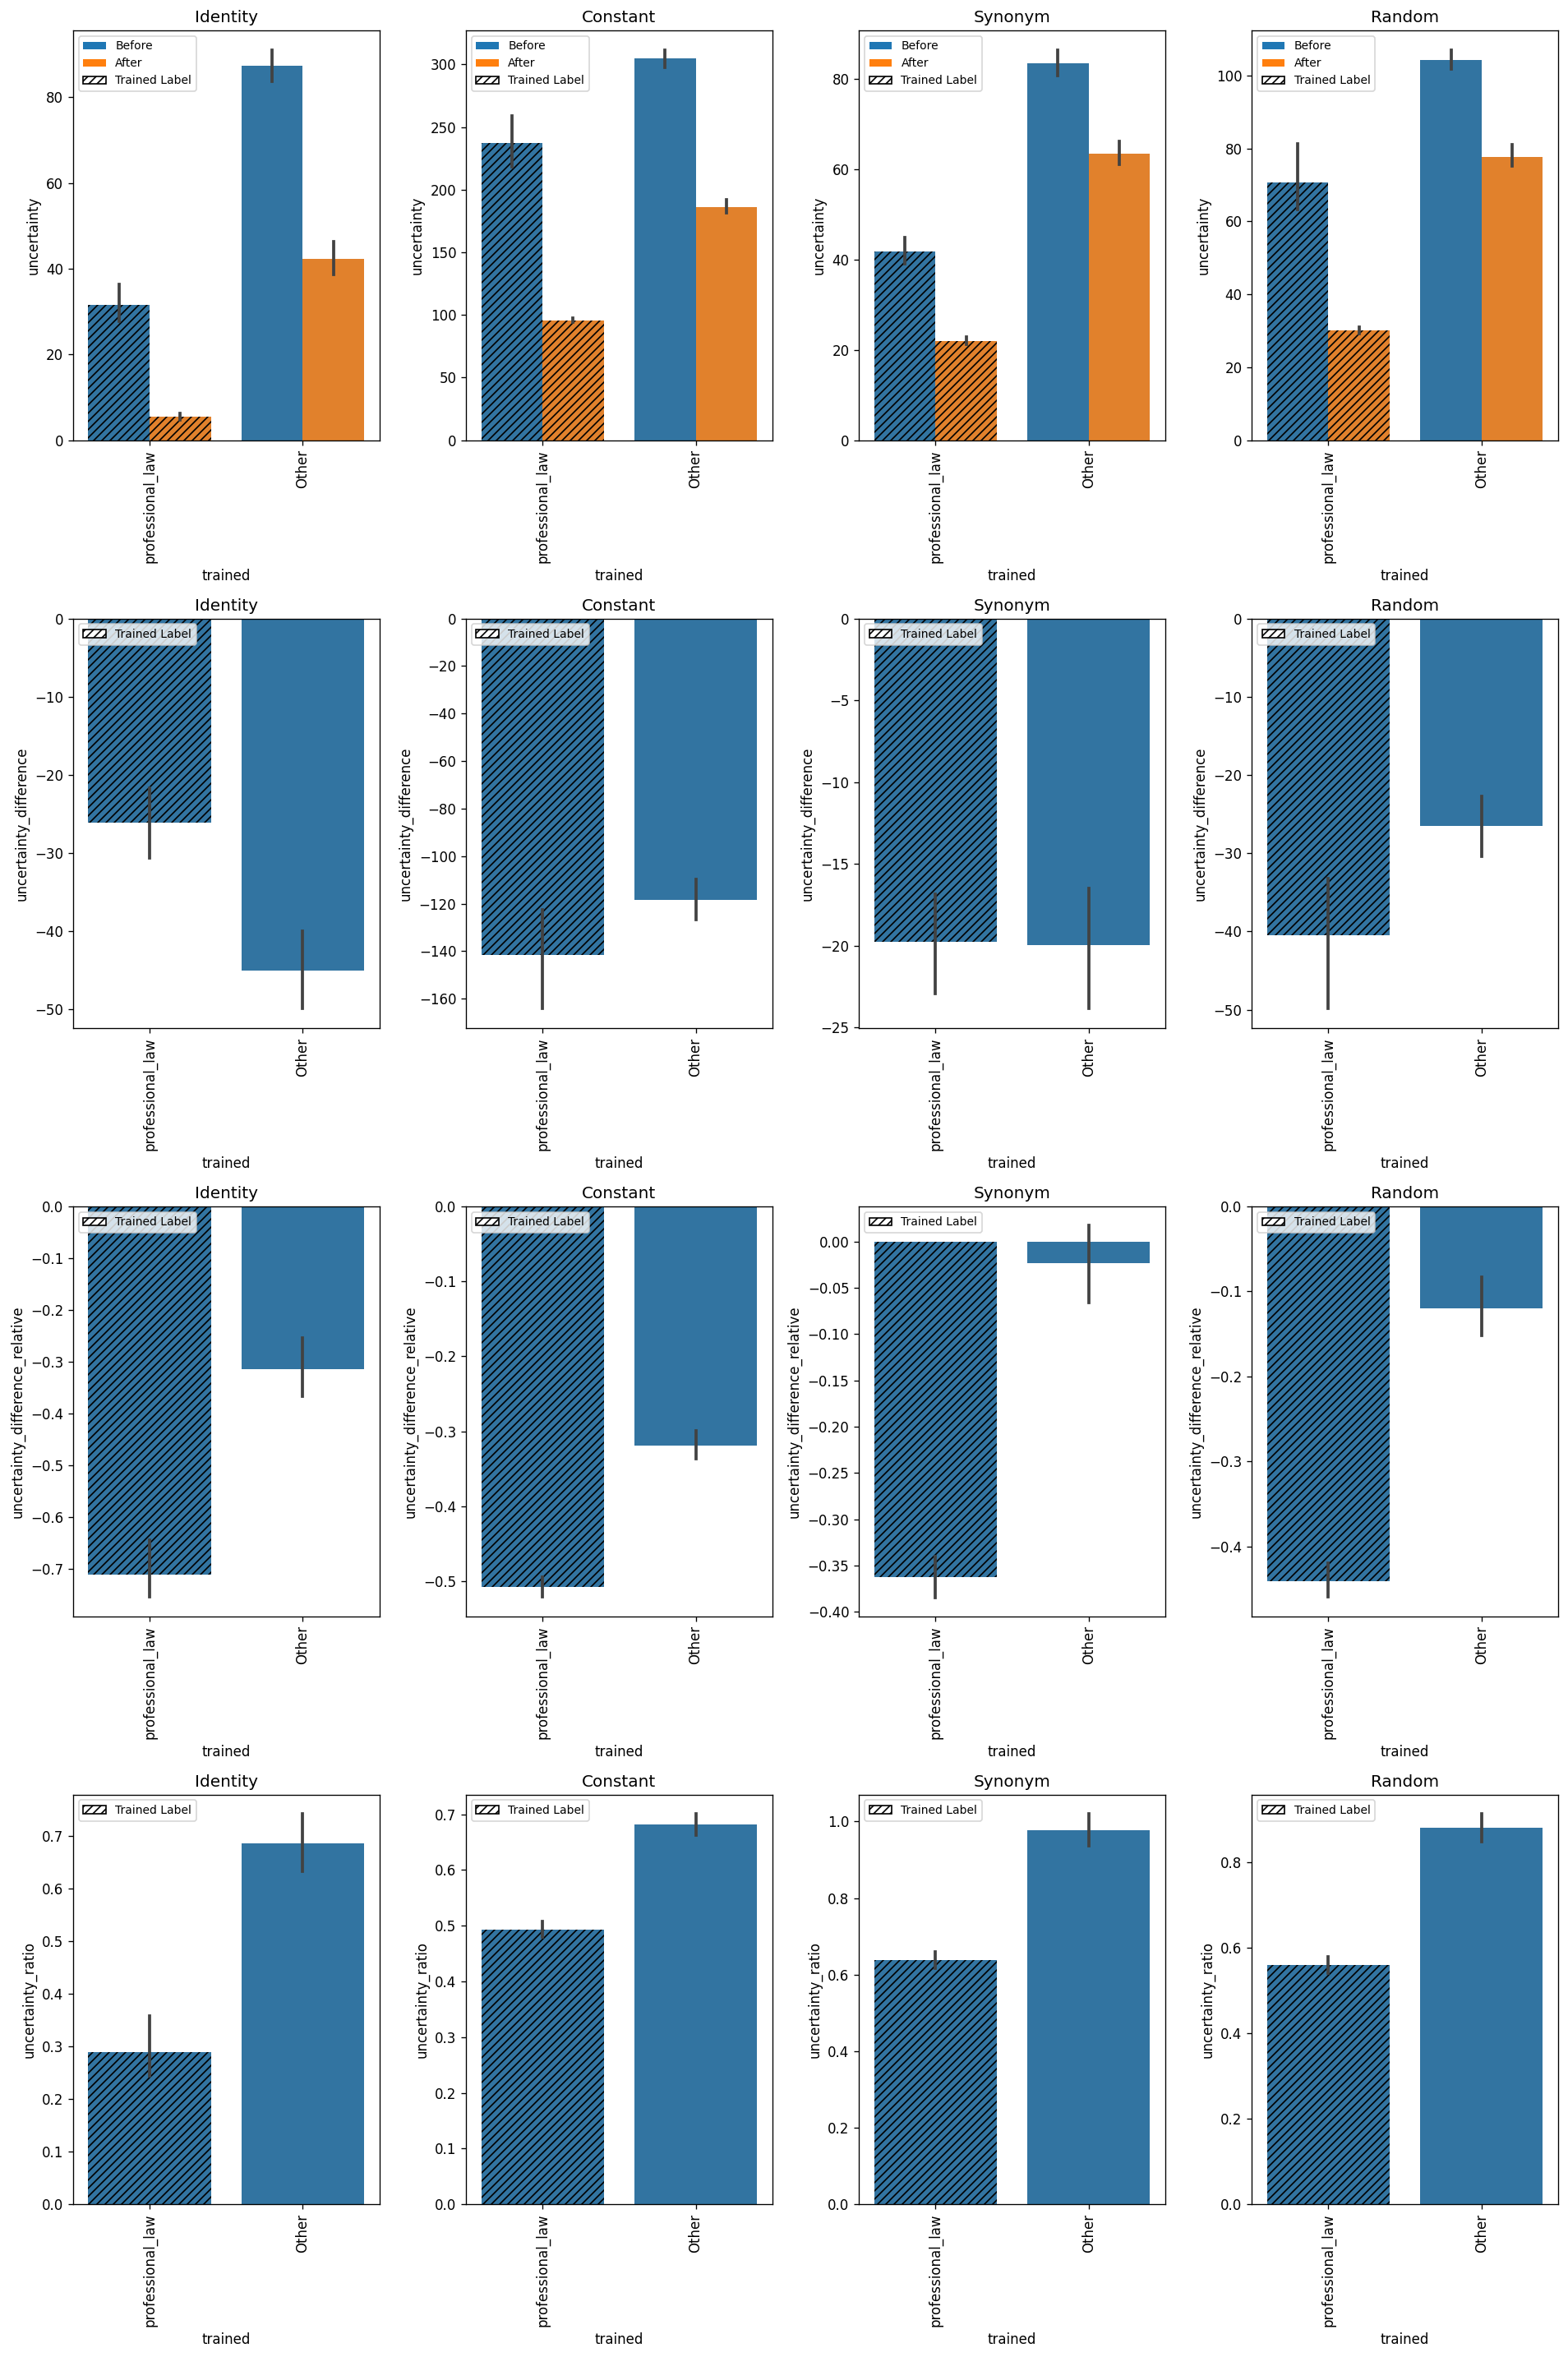

In [192]:
plot(dfs, "trained", experiment, dataset)

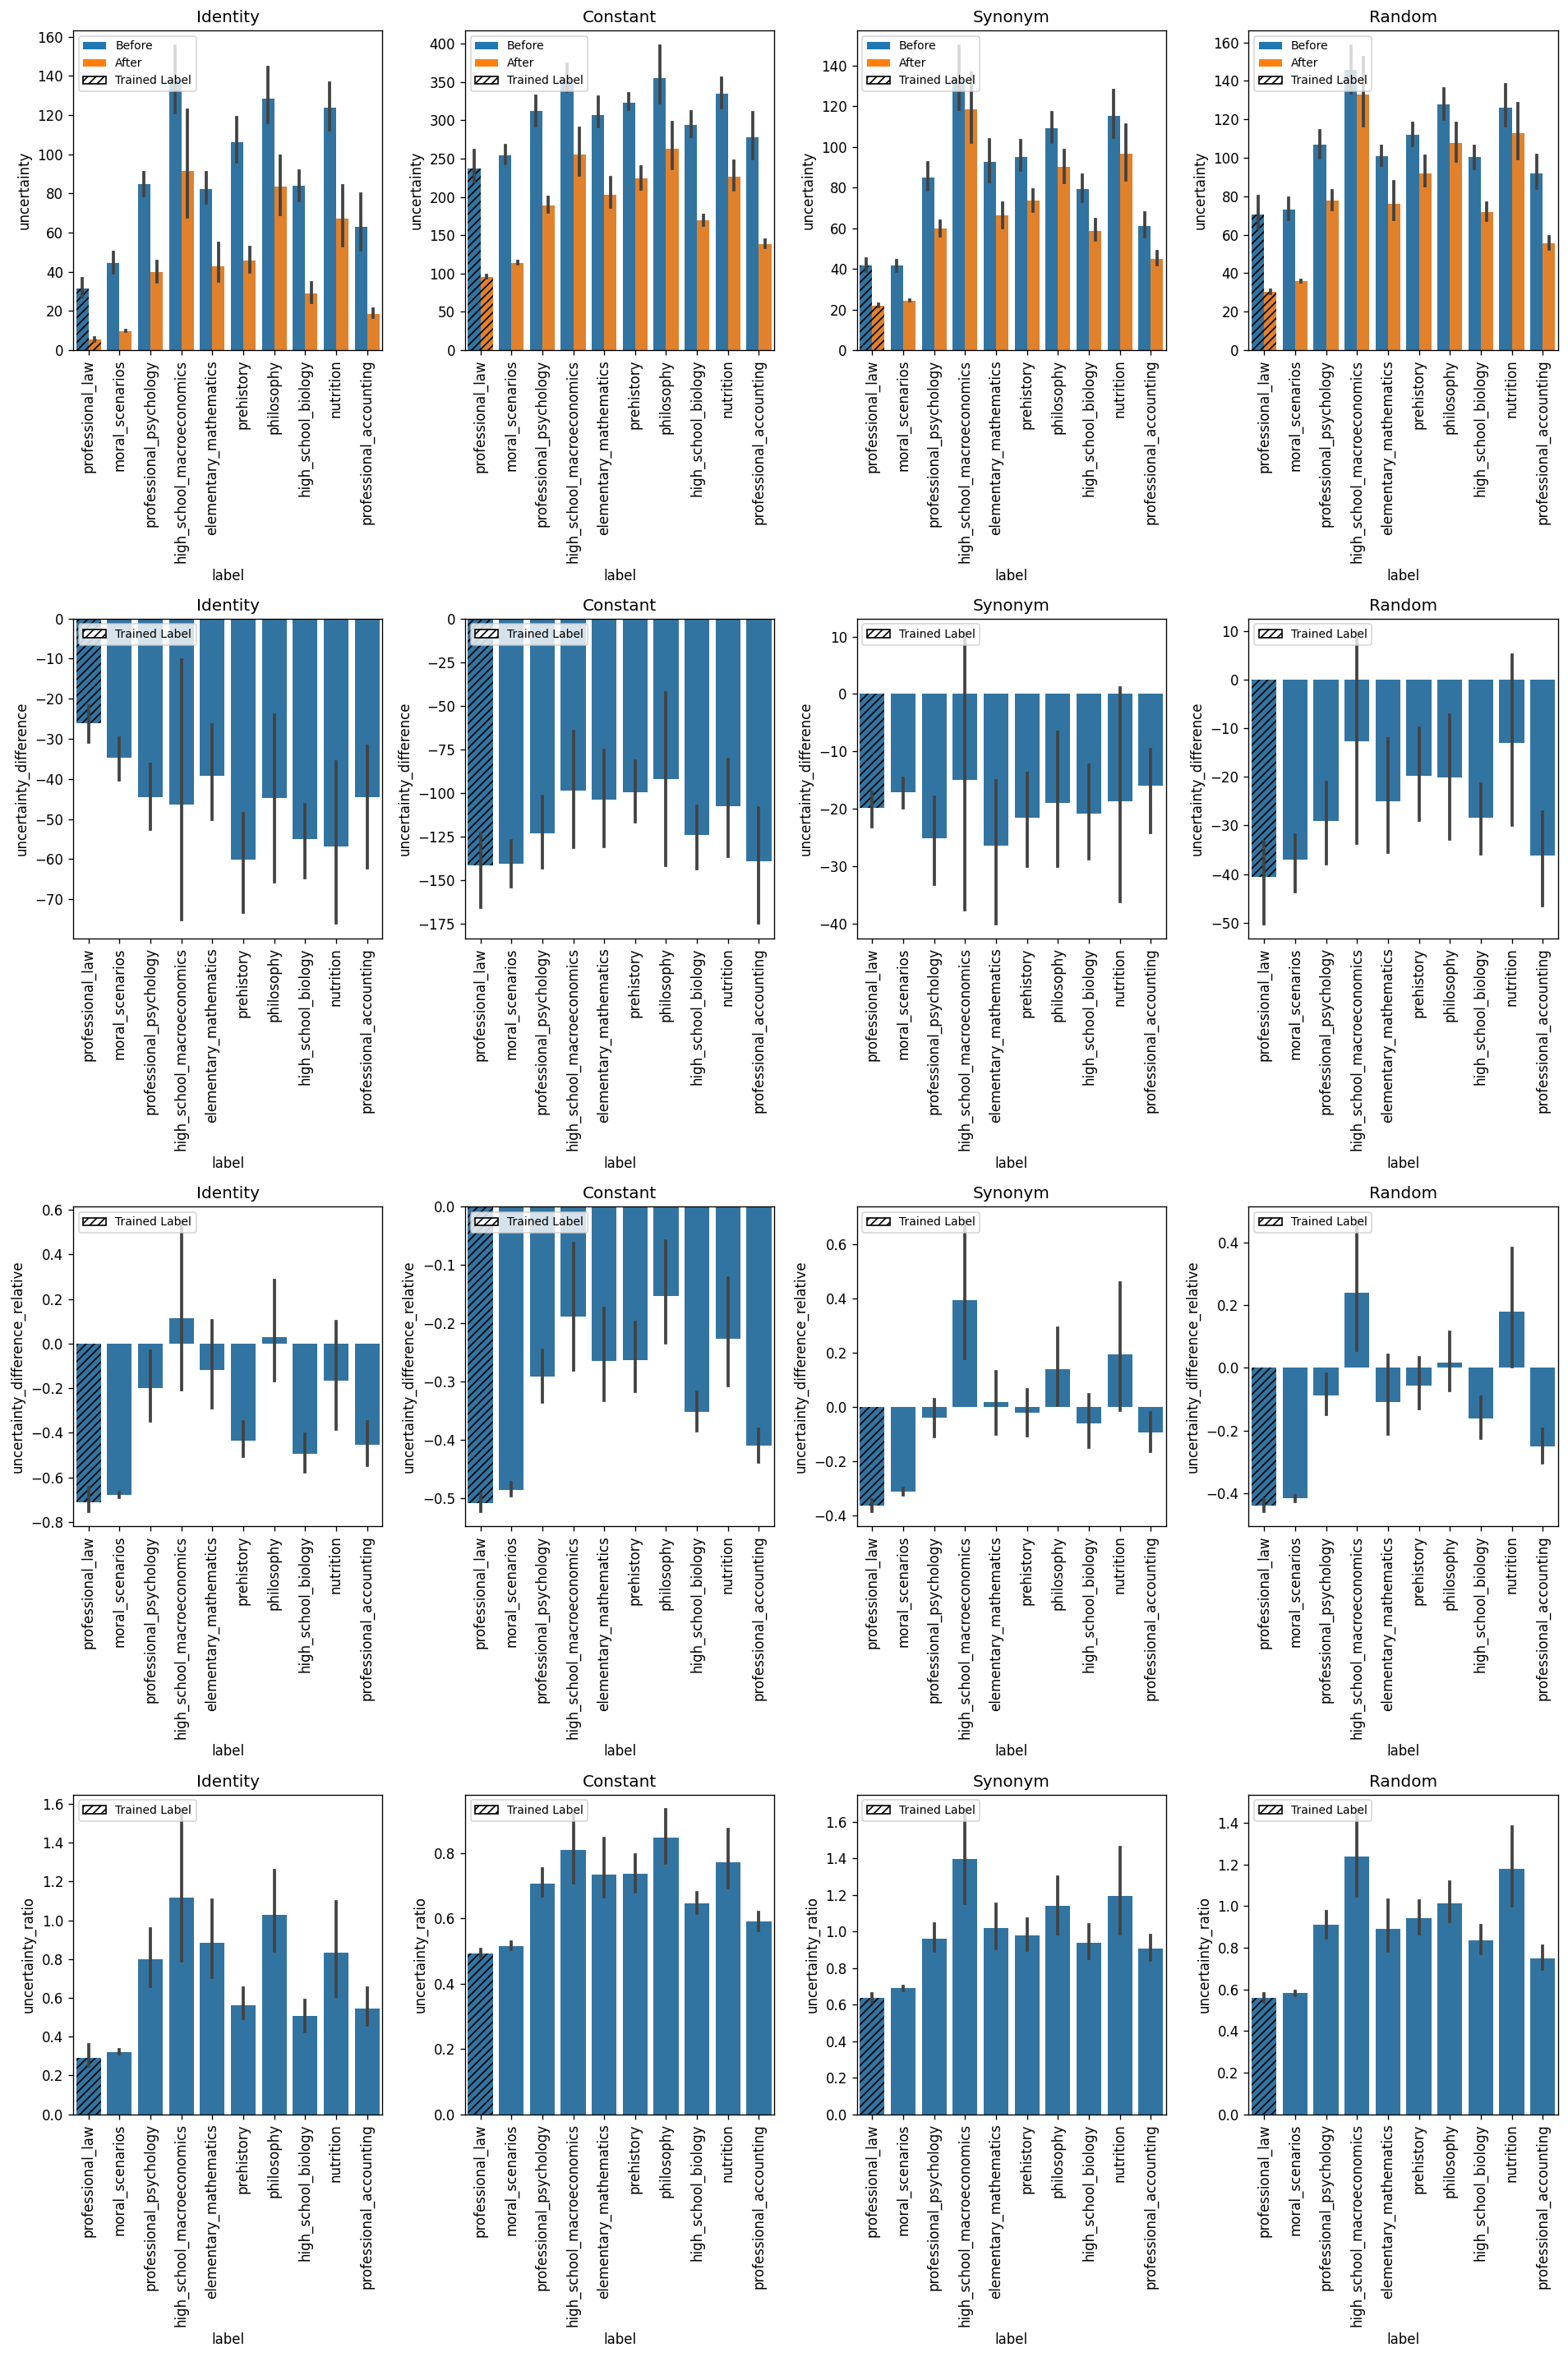

In [193]:
plot(dfs, "label", experiment, dataset)

In [194]:
def t_tests(dfs, metric):
    for name, trained_label, df in dfs:
        trained_group = df[df["label"] == trained_label][metric]
        other_groups = df[df["label"] != trained_label][metric]

        t_stat, p_value = ttest_ind(trained_group, other_groups, equal_var=False)

        print(
            f"{name:<10} {trained_label} vs Others T-statistic: {t_stat:>12.4f}, P-value: {p_value:.4f}"
        )
    
    print()

    for name, trained_label, df in dfs:
        trained_group = df[df["label"] == trained_label][metric]

        labels = df["label"].unique()

        for label in labels:
            if label != trained_label:
                other_group = df[df["label"] == label][metric]
                t_stat, p_value = ttest_ind(trained_group, other_group, equal_var=False)
                print(
                    f"{name:<10} {trained_label} vs {label:<10} T-statistic: {t_stat:>12.4f}, P-value: {p_value:.4f}"
                )

In [195]:
t_tests(dfs, "uncertainty_difference_relative")

Identity   professional_law vs Others T-statistic:      -9.6125, P-value: 0.0000
Constant   professional_law vs Others T-statistic:     -15.1731, P-value: 0.0000
Synonym    professional_law vs Others T-statistic:     -14.2914, P-value: 0.0000
Random     professional_law vs Others T-statistic:     -15.7810, P-value: 0.0000

Identity   professional_law vs moral_scenarios T-statistic:      -1.1478, P-value: 0.2515
Identity   professional_law vs professional_psychology T-statistic:      -6.1033, P-value: 0.0000
Identity   professional_law vs high_school_macroeconomics T-statistic:      -4.2104, P-value: 0.0000
Identity   professional_law vs elementary_mathematics T-statistic:      -5.5255, P-value: 0.0000
Identity   professional_law vs prehistory T-statistic:      -5.5232, P-value: 0.0000
Identity   professional_law vs philosophy T-statistic:      -6.6329, P-value: 0.0000
Identity   professional_law vs high_school_biology T-statistic:      -4.1521, P-value: 0.0000
Identity   professional_l

In [196]:
t_tests(dfs, "uncertainty_ratio")

Identity   professional_law vs Others T-statistic:      -9.6125, P-value: 0.0000
Constant   professional_law vs Others T-statistic:     -15.1731, P-value: 0.0000
Synonym    professional_law vs Others T-statistic:     -14.2914, P-value: 0.0000
Random     professional_law vs Others T-statistic:     -15.7810, P-value: 0.0000

Identity   professional_law vs moral_scenarios T-statistic:      -1.1478, P-value: 0.2515
Identity   professional_law vs professional_psychology T-statistic:      -6.1033, P-value: 0.0000
Identity   professional_law vs high_school_macroeconomics T-statistic:      -4.2104, P-value: 0.0000
Identity   professional_law vs elementary_mathematics T-statistic:      -5.5255, P-value: 0.0000
Identity   professional_law vs prehistory T-statistic:      -5.5232, P-value: 0.0000
Identity   professional_law vs philosophy T-statistic:      -6.6329, P-value: 0.0000
Identity   professional_law vs high_school_biology T-statistic:      -4.1521, P-value: 0.0000
Identity   professional_l